### We learn How to use Einstein Summation Notation

In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt 

def show(img):
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)

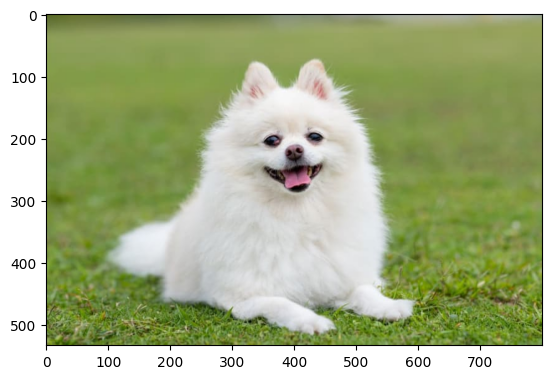

In [2]:
img = cv2.imread("dog.jpeg")
show(img)

#### Muptiplying Scalar and Vector

In [46]:
a = 10 
v = np.array([1,-2,3])
print(a*v)

[ 10 -20  30]


In [48]:
print(v.dot(a))

[ 10 -20  30]


In [49]:
print(np.einsum(', i', a,v))
print(np.einsum('i, ', v,a))

[ 10 -20  30]
[ 10 -20  30]


#### Muptiplying Scalar and Matrix (m*n)

In [55]:
A  = np.array([[1,2,3],
               [4,5,6]])

a = -2 
print(a *A)
print()
print(A.dot(a))
print()
print(np.einsum(',ij', a, A))

[[ -2  -4  -6]
 [ -8 -10 -12]]

[[ -2  -4  -6]
 [ -8 -10 -12]]

[[ -2  -4  -6]
 [ -8 -10 -12]]


#### Mutiplying Vector and Vector

In [26]:
v1 = np.array([1,2,3])
v2 = np.array([-1,2,1])
print(v1.dot(v2))
print(v2.dot(v1))
print(np.einsum('i,i->', v1, v2))

6
6
6


In [23]:
print(np.einsum('i,j',v1,v2))

[[-1  2  1]
 [-2  4  2]
 [-3  6  3]]


#### Multiplying vector and matrix

In [58]:
v = np.array([1,-2,1])
A  = np.array([[1,2,3],
               [4,5,6]])

print(A.dot(v))

[0 0]


In [60]:
print(np.einsum('ij,j', A,v))

[0 0]


In [61]:
print(np.einsum('j,ij', v,A))

[0 0]


#### Multiple Matrix and Matrix

In [65]:
A = np.array([[-1, 2],
              [2,3]])

B = np.array([[-1, 2,-3],
              [1,3,-3]])

print(A.dot(B))
print()
print(A@B)

[[  3   4  -3]
 [  1  13 -15]]

[[  3   4  -3]
 [  1  13 -15]]


In [66]:
print(np.einsum('ij, jk', A,B))

[[  3   4  -3]
 [  1  13 -15]]


In [68]:
print(np.einsum('ij, jk', B.T,A))

[[  3   1]
 [  4  13]
 [ -3 -15]]


#### 3-Dimention Matrix Multiplying Matrix 

$$A \epsilon R^{c, m,n}\space @ \space B \epsilon R^{n,k} = C \epsilon R^{c,m,k} $$

In [17]:
A = np.array([[[1,2,2],[-1,2,2]], 
              [[-2,3,2],[1,2,2]], 
              [[1,0,2],[-1,2,2]]])

B = np.array([[1,3],[2,1],[2,0]])

In [18]:
print(A)
print(A.shape)

[[[ 1  2  2]
  [-1  2  2]]

 [[-2  3  2]
  [ 1  2  2]]

 [[ 1  0  2]
  [-1  2  2]]]
(3, 2, 3)


In [19]:
print(B)
print(B.shape)

[[1 3]
 [2 1]
 [2 0]]
(3, 2)


In [20]:
print(A@B)
print((A@B).shape)

[[[ 9  5]
  [ 7 -1]]

 [[ 8 -3]
  [ 9  5]]

 [[ 5  3]
  [ 7 -1]]]
(3, 2, 2)


In [21]:
print(B@A)

[[[-2  8  8]
  [ 1  6  6]
  [ 2  4  4]]

 [[ 1  9  8]
  [-3  8  6]
  [-4  6  4]]

 [[-2  6  8]
  [ 1  2  6]
  [ 2  0  4]]]


In [22]:
print(np.einsum('ijk,kl', A,B))

[[[ 9  5]
  [ 7 -1]]

 [[ 8 -3]
  [ 9  5]]

 [[ 5  3]
  [ 7 -1]]]


In [114]:
print(np.einsum('ij,kjl', B,A))

[[[-2  8  8]
  [ 1  9  8]
  [-2  6  8]]

 [[ 1  6  6]
  [-3  8  6]
  [ 1  2  6]]

 [[ 2  4  4]
  [-4  6  4]
  [ 2  0  4]]]


#### 3-Dimention Matrix Multiplying Vector 

In [127]:
A = np.array([[[1,3],[2,4]], 
              [[0,1],[0,2]], 
              [[1,2],[1,2]]])

B = np.array([1,2,3])

In [134]:
print(A[:,0,0]@B)
print(A[:,0,1]@B)
print(A[:,1,0]@B)
print(A[:,1,1]@B)

4
11
5
14


In [135]:
print(np.einsum('kij,k',A,B))

[[ 4 11]
 [ 5 14]]


#### Using Einstein to convert color image to gray image

In [4]:
img = cv2.imread("dog.jpeg")
img.shape

(534, 800, 3)

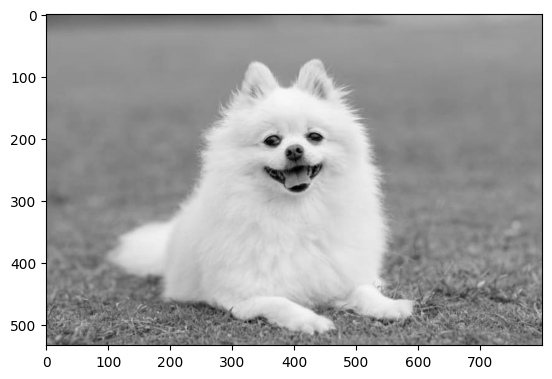

In [7]:
# channel_r * 0.21 + channel_g *  0.72 + channel_b* 0.07
k = np.array([0.07, 0.72, 0.21])
gray = np.einsum("ijk,k", img,k)

gray = gray.astype(np.uint8)
show(gray)

#### Multipying Tensor by a Tensor

In [23]:
A = np.array([[[1,2,2],[-1,2,2]], 
              [[-2,3,2],[1,2,2]], 
              [[1,0,2],[-1,2,2]]])

B = np.array([
    [[1,3],[2,1],[2,0]],
    [[1,3],[2,1],[2,0]],
    [[1,3],[2,1],[2,0]]])

In [25]:
print(f'A shape: {A.shape}')
print(f'B shape: {B.shape}')

A shape: (3, 2, 3)
B shape: (3, 3, 2)


In [26]:
print(A@B)

[[[ 9  5]
  [ 7 -1]]

 [[ 8 -3]
  [ 9  5]]

 [[ 5  3]
  [ 7 -1]]]


In [35]:
print(np.einsum('kij,kjl', A,B))

ValueError: operand has more dimensions than subscripts given in einstein sum, but no '...' ellipsis provided to broadcast the extra dimensions.